In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =pd.read_csv("test.csv")

In [3]:
df.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,18524,3.0,No,7.0,4.0,No,6.0,NaN
1,18525,NaN,Yes,0.0,0.0,Yes,5.0,1.0
2,18526,3.0,No,5.0,6.0,No,15.0,9.0
3,18527,3.0,No,4.0,4.0,No,5.0,6.0
4,18528,9.0,Yes,1.0,2.0,Yes,1.0,1.0


In [4]:
df.isnull().sum()

id                             0
Time_spent_Alone             425
Stage_fear                   598
Social_event_attendance      397
Going_outside                466
Drained_after_socializing    432
Friends_circle_size          350
Post_frequency               408
dtype: int64

Skewness of 'Time_spent_Alone': 1.1535


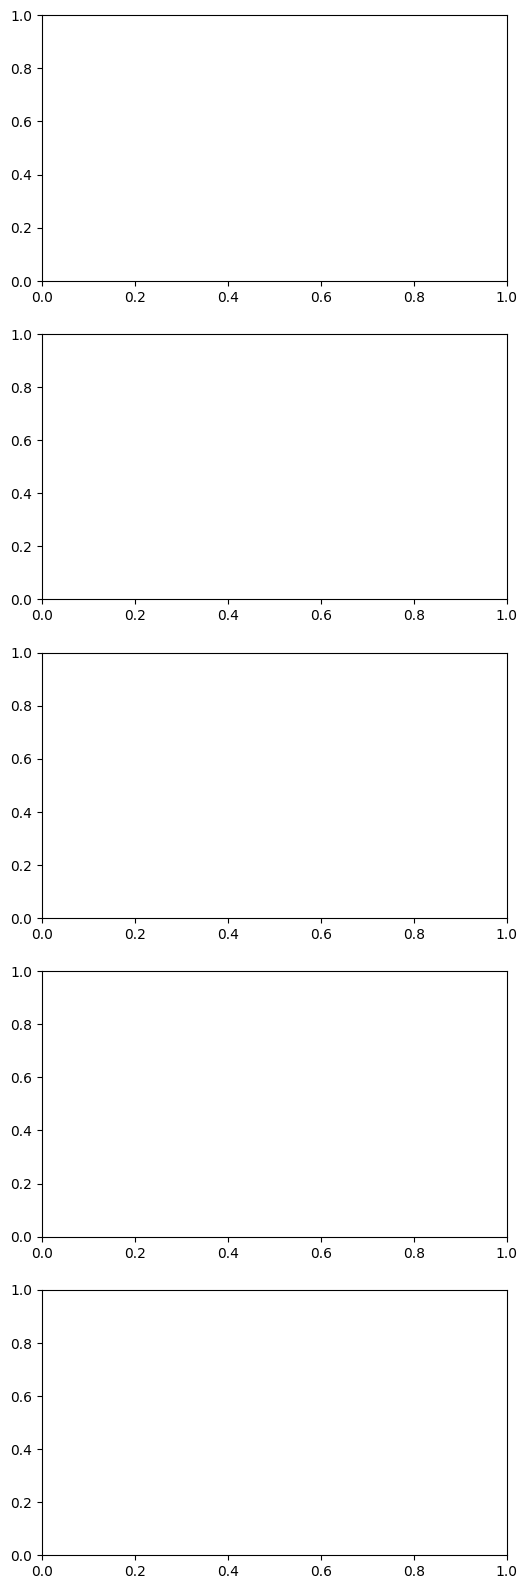

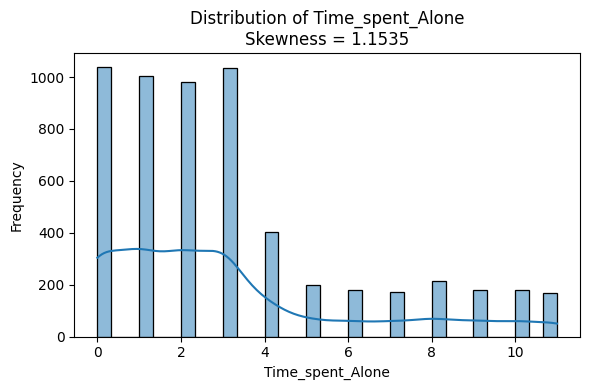

Skewness of 'Social_event_attendance': -0.2444


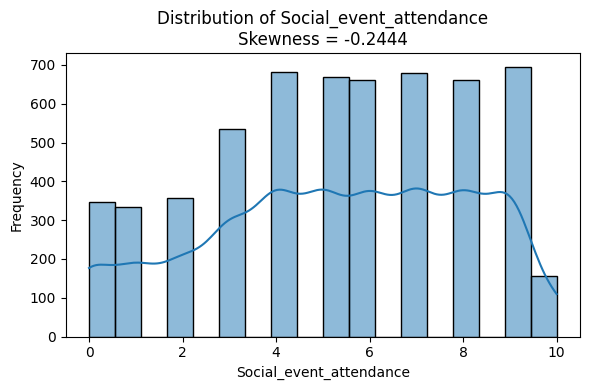

Skewness of 'Going_outside': -0.3454


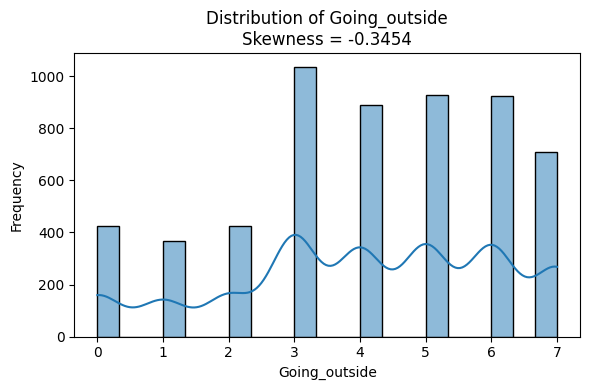

Skewness of 'Friends_circle_size': -0.0650


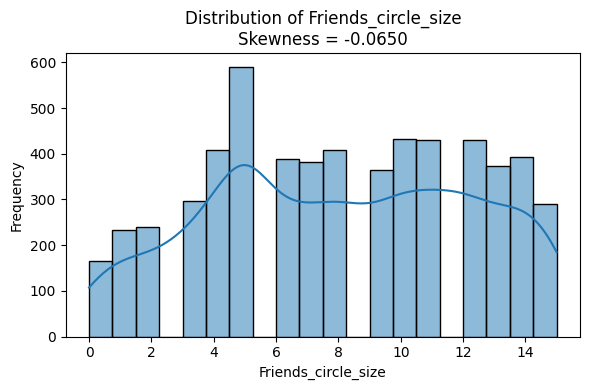

Skewness of 'Post_frequency': -0.0750


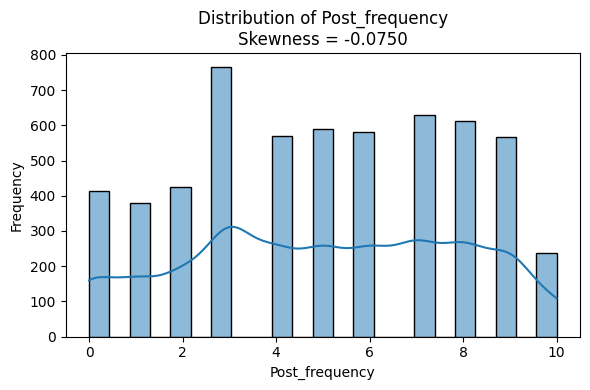

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = ['Time_spent_Alone','Social_event_attendance', 'Going_outside','Friends_circle_size','Post_frequency'  ]
n = len(columns)

fig, axes = plt.subplots(n, 1, figsize=(6, 4 * n))

for col in columns:
    skew_val = df[col].skew()
    print(f"Skewness of '{col}': {skew_val:.4f}")
    
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}\nSkewness = {skew_val:.4f}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()




In [6]:

numerical_cols = [
    'Social_event_attendance',
    'Going_outside',
    'Friends_circle_size',
    'Post_frequency'
]

categorical_cols = ['Stage_fear', 'Drained_after_socializing']

In [7]:
from sklearn.impute import SimpleImputer

In [10]:

num_imputer = SimpleImputer(strategy='mean')

median=SimpleImputer(strategy='median')

cat_imputer = SimpleImputer(strategy='most_frequent')


In [11]:
df[numerical_cols]=num_imputer.fit_transform(df[numerical_cols])
df[["Time_spent_Alone"]]=median.fit_transform(df[["Time_spent_Alone"]])
df[categorical_cols]=cat_imputer.fit_transform(df[categorical_cols])

In [12]:
df.isnull().sum()

id                           0
Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
dtype: int64

In [13]:
df.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,18524,3.0,No,7.0,4.0,No,6.0,5.028958
1,18525,2.0,Yes,0.0,0.0,Yes,5.0,1.000000
2,18526,3.0,No,5.0,6.0,No,15.0,9.000000
3,18527,3.0,No,4.0,4.0,No,5.0,6.000000
4,18528,9.0,Yes,1.0,2.0,Yes,1.0,1.000000


In [14]:
df['Stage_fear'] = df['Stage_fear'].map({'Yes': 1, 'No': 0})
df['Drained_after_socializing'] = df['Drained_after_socializing'].map({'Yes': 1, 'No': 0})


In [15]:
df.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,18524,3.0,0,7.0,4.0,0,6.0,5.028958
1,18525,2.0,1,0.0,0.0,1,5.0,1.000000
2,18526,3.0,0,5.0,6.0,0,15.0,9.000000
3,18527,3.0,0,4.0,4.0,0,5.0,6.000000
4,18528,9.0,1,1.0,2.0,1,1.0,1.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6175 entries, 0 to 6174
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         6175 non-null   int64  
 1   Time_spent_Alone           6175 non-null   float64
 2   Stage_fear                 6175 non-null   int64  
 3   Social_event_attendance    6175 non-null   float64
 4   Going_outside              6175 non-null   float64
 5   Drained_after_socializing  6175 non-null   int64  
 6   Friends_circle_size        6175 non-null   float64
 7   Post_frequency             6175 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 386.1 KB


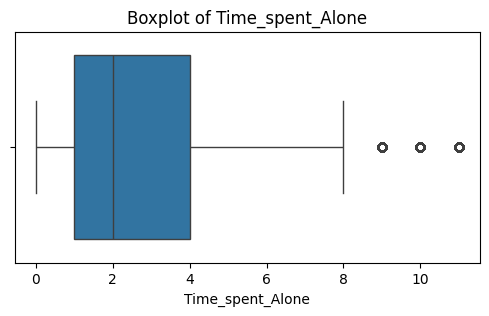

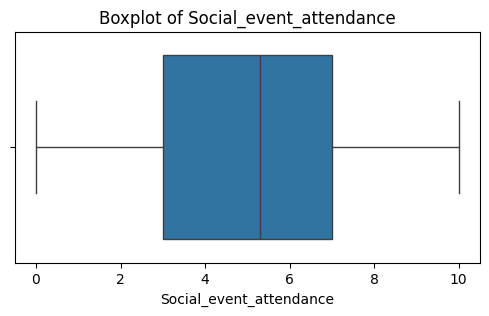

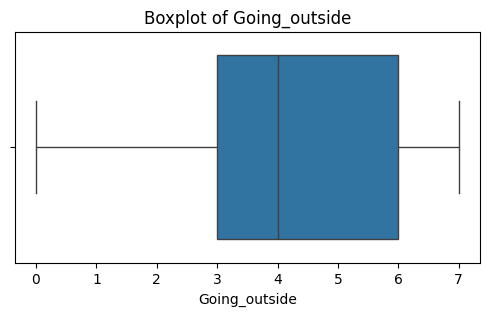

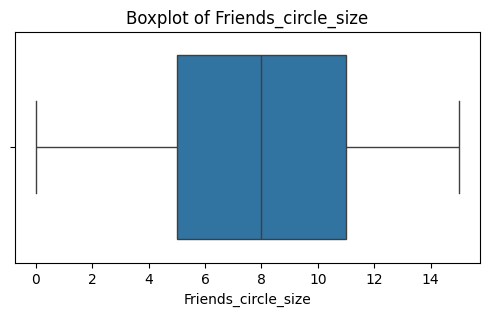

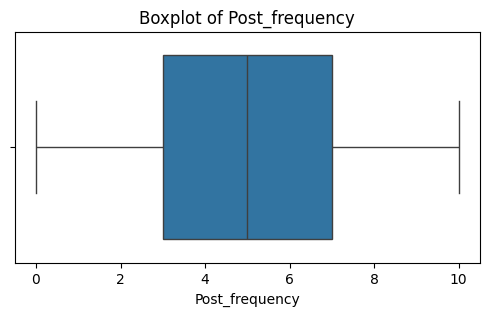

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 
                'Friends_circle_size', 'Post_frequency']

for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [18]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")


Time_spent_Alone: 529 outliers
Social_event_attendance: 0 outliers
Going_outside: 0 outliers
Friends_circle_size: 0 outliers
Post_frequency: 0 outliers


In [19]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_extreme = Q1 - 3 * IQR
    upper_extreme = Q3 + 3 * IQR

    df = df[(df[col] >= lower_extreme) & (df[col] <= upper_extreme)]


In [20]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df[col] = df[col].clip(lower, upper)


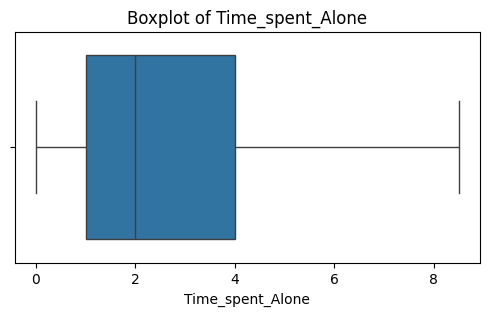

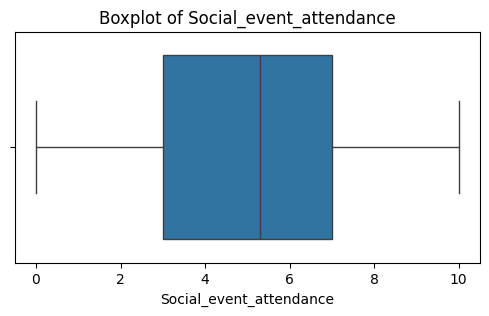

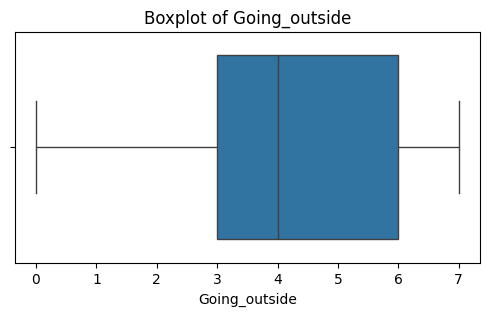

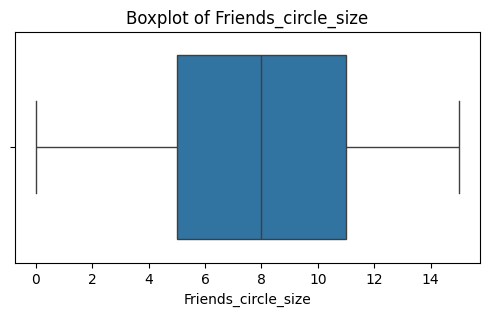

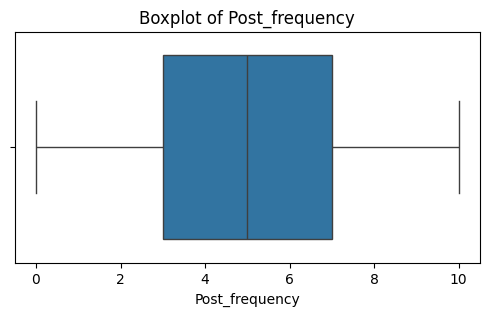

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 
                'Friends_circle_size', 'Post_frequency']

for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [22]:
df['social_balance'] = df['Social_event_attendance'] - df['Time_spent_Alone']


In [23]:
df['is_social'] = (df['Social_event_attendance'] > 5).astype(int)


In [24]:
df['Post_frequency'] = np.log1p(df['Post_frequency'])


In [25]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler


scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numerical_cols])


scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[numerical_cols])


In [26]:
df[numerical_cols]=df_scaled

In [27]:
df.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,social_balance,is_social
0,18524,3.0,0,0.7,0.571429,0,0.400000,0.749230,4.0,1
1,18525,2.0,1,0.0,0.000000,1,0.333333,0.289065,-2.0,0
2,18526,3.0,0,0.5,0.857143,0,1.000000,0.960253,2.0,0
3,18527,3.0,0,0.4,0.571429,0,0.333333,0.811508,1.0,0
4,18528,8.5,1,0.1,0.285714,1,0.066667,0.289065,-7.5,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6175 entries, 0 to 6174
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         6175 non-null   int64  
 1   Time_spent_Alone           6175 non-null   float64
 2   Stage_fear                 6175 non-null   int64  
 3   Social_event_attendance    6175 non-null   float64
 4   Going_outside              6175 non-null   float64
 5   Drained_after_socializing  6175 non-null   int64  
 6   Friends_circle_size        6175 non-null   float64
 7   Post_frequency             6175 non-null   float64
 8   social_balance             6175 non-null   float64
 9   is_social                  6175 non-null   int64  
dtypes: float64(6), int64(4)
memory usage: 482.6 KB


In [31]:
X=df.drop("id",axis=1)

In [32]:
X.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,social_balance,is_social
0,3.0,0,0.7,0.571429,0,0.400000,0.749230,4.0,1
1,2.0,1,0.0,0.000000,1,0.333333,0.289065,-2.0,0
2,3.0,0,0.5,0.857143,0,1.000000,0.960253,2.0,0
3,3.0,0,0.4,0.571429,0,0.333333,0.811508,1.0,0
4,8.5,1,0.1,0.285714,1,0.066667,0.289065,-7.5,0


In [34]:
import joblib
from sklearn.metrics import accuracy_score


model = joblib.load("voting_model.pkl")


y_pred = model.predict(X)


C:\Users\HP\Desktop\prof\learn\MLlearning\Kaggle competition\kenv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\HP\Desktop\prof\learn\MLlearning\Kaggle competition\kenv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Users\HP\Desktop\prof\learn\MLlearning\Kaggle competition\kenv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


In [38]:
import pandas as pd
import numpy as np


start_id = 18524
ids = np.arange(start_id, start_id + len(y_pred))

personality = ['Extrovert' if val == 1 else 'Introvert' for val in y_pred]


submission_df = pd.DataFrame({
    'id': ids,
    'Personality': personality
})


print(submission_df.head())



      id Personality
0  18524   Extrovert
1  18525   Introvert
2  18526   Extrovert
3  18527   Extrovert
4  18528   Introvert


In [39]:

submission_df.to_csv('submission.csv', index=False)